Importing necessary libraries to be used, creating a data for analysis and plotting the data.
Here X is the real data and y is the true label associated with the data.

Mounted at /drive
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


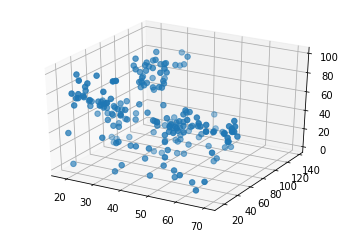

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/drive')
Data = pd.read_csv("/drive/My Drive/Colab Notebooks/Mall_Customers.csv")
print(Data.head())

X1 = Data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X = X1.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],s=30)

Parameters for Mean shift clustering: Here we declare the parameters needed for mean shift clustering

In [2]:
r = 10  #radius
n_iter = 15

Cluster centroids initialization: All data points are initialised to be cluster centroids. We will do the grouping of similar centroids together in the next step

In [3]:
centroids = dict(zip(range(X.shape[0]),np.array([X[i,:] for i in range(X.shape[0])]))) #dictionary of our centroids
print(centroids)

{0: array([19, 15, 39]), 1: array([21, 15, 81]), 2: array([20, 16,  6]), 3: array([23, 16, 77]), 4: array([31, 17, 40]), 5: array([22, 17, 76]), 6: array([35, 18,  6]), 7: array([23, 18, 94]), 8: array([64, 19,  3]), 9: array([30, 19, 72]), 10: array([67, 19, 14]), 11: array([35, 19, 99]), 12: array([58, 20, 15]), 13: array([24, 20, 77]), 14: array([37, 20, 13]), 15: array([22, 20, 79]), 16: array([35, 21, 35]), 17: array([20, 21, 66]), 18: array([52, 23, 29]), 19: array([35, 23, 98]), 20: array([35, 24, 35]), 21: array([25, 24, 73]), 22: array([46, 25,  5]), 23: array([31, 25, 73]), 24: array([54, 28, 14]), 25: array([29, 28, 82]), 26: array([45, 28, 32]), 27: array([35, 28, 61]), 28: array([40, 29, 31]), 29: array([23, 29, 87]), 30: array([60, 30,  4]), 31: array([21, 30, 73]), 32: array([53, 33,  4]), 33: array([18, 33, 92]), 34: array([49, 33, 14]), 35: array([21, 33, 81]), 36: array([42, 34, 17]), 37: array([30, 34, 73]), 38: array([36, 37, 26]), 39: array([20, 37, 75]), 40: array

Iterations for mean shift clustering: We perform the necessary iterations for mean shift clustering to decide the clusters needed at the end.

In [4]:
for n in range(n_iter): #not more steps than our n - max iteration value
    new_centroids = centroids.copy()
    updated_sample = []
    for i in range(len(centroids)):
        centroid = centroids[i] #picking up one centroid
        neighbor = [] #we are defining neighbors and index
        index    = []
        for j in range(X.shape[0]): # data.shape -> (how many dimentions, number of elements ) - we take first value
            sample = X[j,:] #we pick a new sample/point
            if np.linalg.norm(sample-centroid)<r: # euclidean distance
                neighbor.append(sample) #we are adding a sample and index
                index.append(j) 
        new_centroid = np.average(neighbor,axis= 0) #it is our new centroid
        for k in range(len(neighbor)): #replacing new_centroids by new_centroid
            new_centroids[index[k]] = new_centroid 
    centroids = new_centroids # replacing our new centroid and we take next interation

Cluster Centroids: We finally set the final clusters

In [5]:
final_centroids = list(new_centroids.values()) 
unique_centroids = np.unique(final_centroids,axis=0) #unique values of centroids
clusters = dict(zip(range(len(unique_centroids)),np.array([unique_centroids[i,:] for i in range(unique_centroids.shape[0])]))) #proper cluster for proper point
getcluster = lambda val : [k for k,v in clusters.items() if (v == val).sum()==len(val)][0] #function for get proper clusters number
df = pd.DataFrame(columns=['Sample_data','Centroids','clusters'])
df['Sample_data'] = list(X) #our points from data
df['Centroids'] = list(final_centroids) #centroids
df['clusters'] = [getcluster(final_centroids[i]) for i in range(len(final_centroids))] #and proper clusters 
df

,Sample_data,Centroids,clusters
0,"[19, 15, 39]","[19.0, 15.0, 39.0]",0
1,"[21, 15, 81]","[23.9, 20.7, 74.7]",11
2,"[20, 16, 6]","[20.0, 16.0, 6.0]",1
3,"[23, 16, 77]","[23.9, 20.7, 74.7]",11
4,"[31, 17, 40]","[35.25, 22.75, 35.25]",33
...,...,...,...
195,"[35, 120, 79]","[33.5, 123.0, 76.5]",30
196,"[45, 126, 28]","[45.0, 126.0, 28.0]",49
197,"[32, 126, 74]","[33.5, 123.0, 76.5]",30
198,"[32, 137, 18]","[32.0, 137.0, 18.0]",23


Plotting final clusters: We plot the final clusters to see that our implementation of Mean-shift clustering gives the same cluster as original.

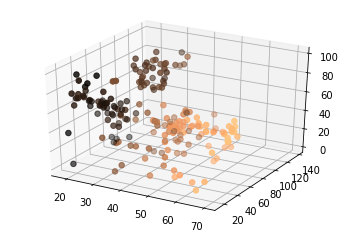

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1], X[:,2],c=df['clusters'].values,s=30,cmap = 'copper');

Comparison with pre-defined function in sklearn

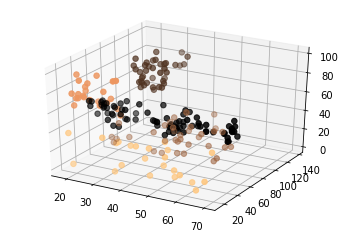

In [7]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth=25).fit(X)
our_labels = meanshift.labels_
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=our_labels,s=30,cmap = 'copper');